In [1]:
#Generating Data for Analysis
#All the Data Generated is completely random

import pandas as pd
import numpy as np
import tabulate as tab

np.random.seed(111)
# Parameters
num_days = 1000  # number of days to generate data for
num_likes = 10000
num_dislikes = 5000
num_comments = 3000
categories = [
    "Technology & Gadgets",
    "Health & Fitness",
    "Travel & Adventure",
    "Food & Cooking",
    "Fashion & Style",
    "Entertainment & Pop Culture",
    "Education & Learning",
    "Finance & Business",
    "DIY & Crafts",
    "Lifestyle & Motivation"
]

# Generate dates
dates = pd.date_range(start="2025-01-01", periods=num_days)

# Generate random data
data = {
    'Date': pd.date_range('2021-01-01', periods=1000),
    'Category' : [np.random.choice(categories) for _ in range(1000)],
    'Number_of_Likes' : np.random.randint(0, 10000, size= 1000),
    'Number_of_Dislikes' : np.random.randint(0, 5000, size= 1000),
    'Number_of_Comments' : np.random.randint(0, 3000, size= 1000)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Optional: Sort by date
df = df.sort_values(by="Date").reset_index(drop=True)

# Display first few rows
print(df.head())


        Date              Category  Number_of_Likes  Number_of_Dislikes  \
0 2021-01-01       Fashion & Style             8293                2528   
1 2021-01-02       Fashion & Style             6919                3379   
2 2021-01-03       Fashion & Style             2641                3236   
3 2021-01-04  Education & Learning             7828                4854   
4 2021-01-05        Food & Cooking             5157                3304   

   Number_of_Comments  
0                2147  
1                 310  
2                2459  
3                1094  
4                1401  


In [2]:
df = pd.DataFrame(data)
df = df.sort_values(by="Date").reset_index(drop=True)

# Now aggregate and compute KPIs
category_df = df.groupby("Category")[["Number_of_Likes", "Number_of_Dislikes", "Number_of_Comments"]].sum()
total_interactions = category_df.sum().sum()

# Total Interactions
category_df["Total_Interactions"] = category_df.sum(axis=1)

# Engagement Rate (ER)
category_df["Engagement_Rate"] = (category_df["Total_Interactions"] / total_interactions) * 100

# Like-to-Comment Ratio (LCR)
category_df["Like_to_Comment_Ratio"] = category_df["Number_of_Likes"] / category_df["Number_of_Comments"].replace(0, 1)

# Comment Rate (CR)
category_df["Comment_Rate"] = (category_df["Number_of_Comments"] / category_df["Total_Interactions"]) * 100

# Like-to-Dislike Ratio (LDR)
category_df["Like_to_Dislike_Ratio"] = category_df["Number_of_Likes"] / category_df["Number_of_Dislikes"].replace(0, 1)

# Sentiment Score (SS)
category_df["Sentiment_Score"] = ((category_df["Number_of_Likes"] - category_df["Number_of_Dislikes"]) / 
                                  (category_df["Number_of_Likes"] + category_df["Number_of_Dislikes"]).replace(0, 1)) * 100

# Category Popularity Index (CPI)
category_df["Category_Popularity_Index"] = (category_df["Total_Interactions"] / total_interactions) * 100

# Category Engagement Depth (CED)
category_df["Category_Engagement_Depth"] = category_df["Number_of_Comments"] / category_df["Total_Interactions"]

# Virality Score (VS)
category_df["Virality_Score"] = (category_df["Number_of_Likes"] + category_df["Number_of_Dislikes"]) / category_df["Number_of_Comments"].replace(0, 1)

# Approval Engagement Score (AES)
category_df["Approval_Engagement_Score"] = category_df["Number_of_Likes"] / (category_df["Number_of_Likes"] + category_df["Number_of_Comments"]).replace(0, 1)

# Round for neatness
category_df = category_df.round(2)

print(tab.tabulate(category_df, headers='keys', tablefmt='grid', showindex=True))


+-----------------------------+-------------------+----------------------+----------------------+----------------------+-------------------+-------------------------+----------------+-------------------------+-------------------+-----------------------------+-----------------------------+------------------+-----------------------------+
| Category                    |   Number_of_Likes |   Number_of_Dislikes |   Number_of_Comments |   Total_Interactions |   Engagement_Rate |   Like_to_Comment_Ratio |   Comment_Rate |   Like_to_Dislike_Ratio |   Sentiment_Score |   Category_Popularity_Index |   Category_Engagement_Depth |   Virality_Score |   Approval_Engagement_Score |
+=============================+===================+======================+======================+======================+===================+=========================+================+=========================+===================+=============================+=============================+==================+==============

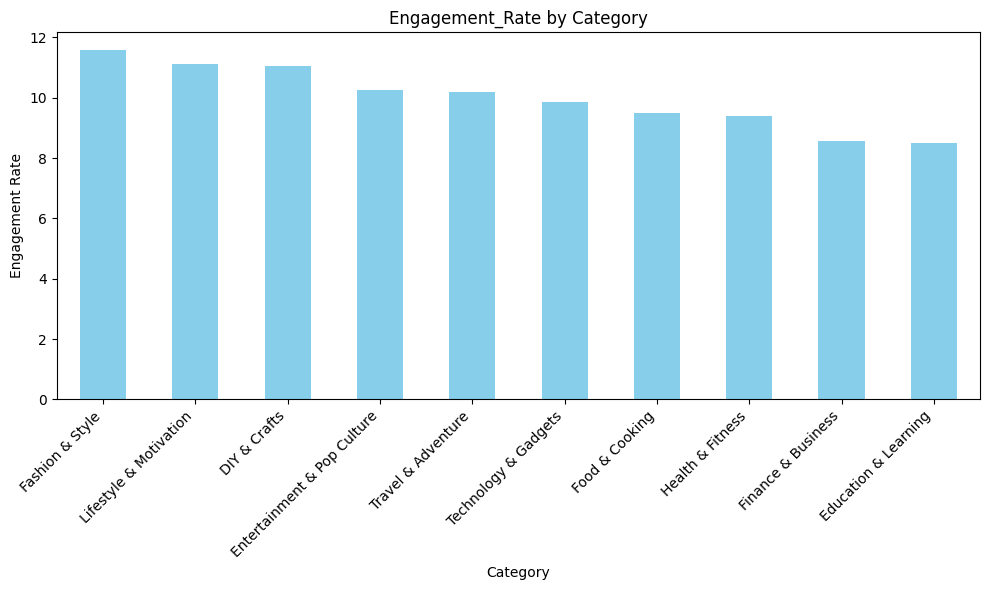

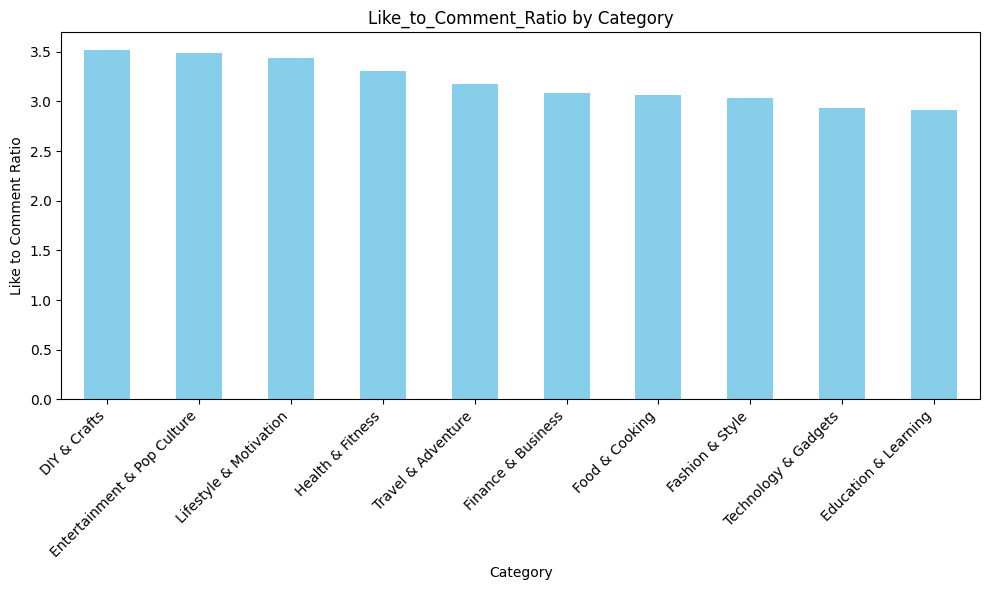

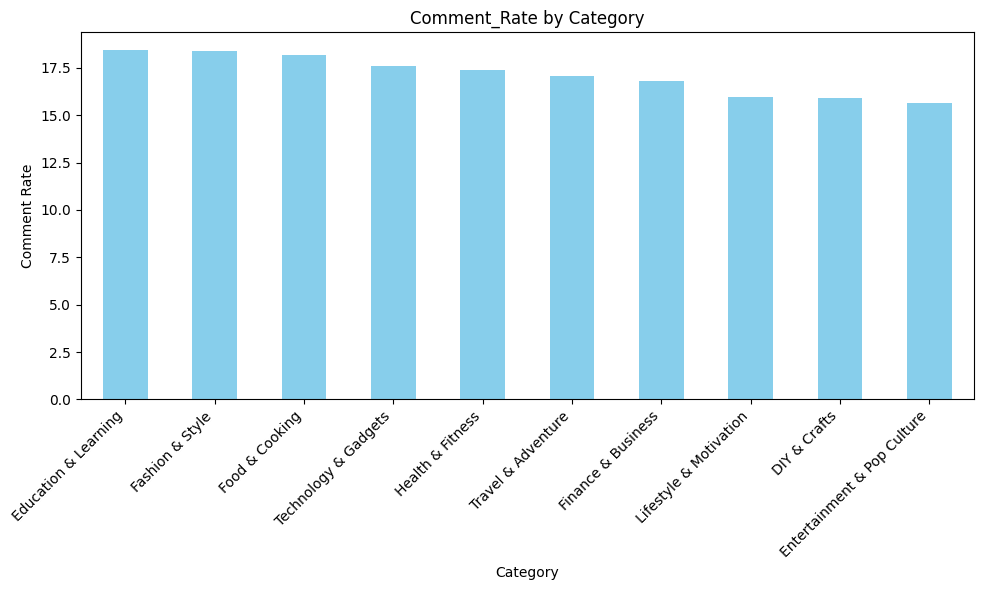

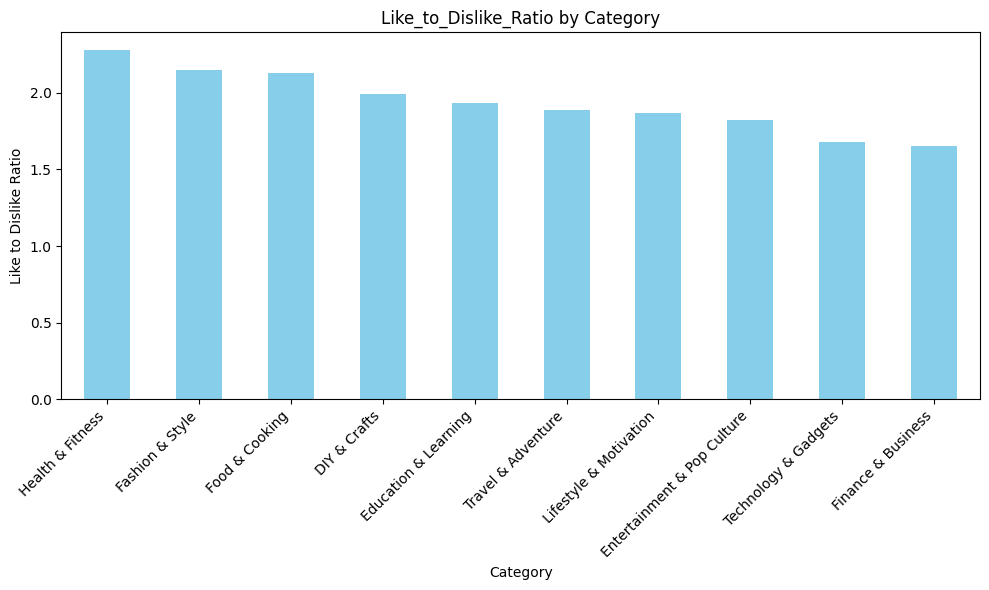

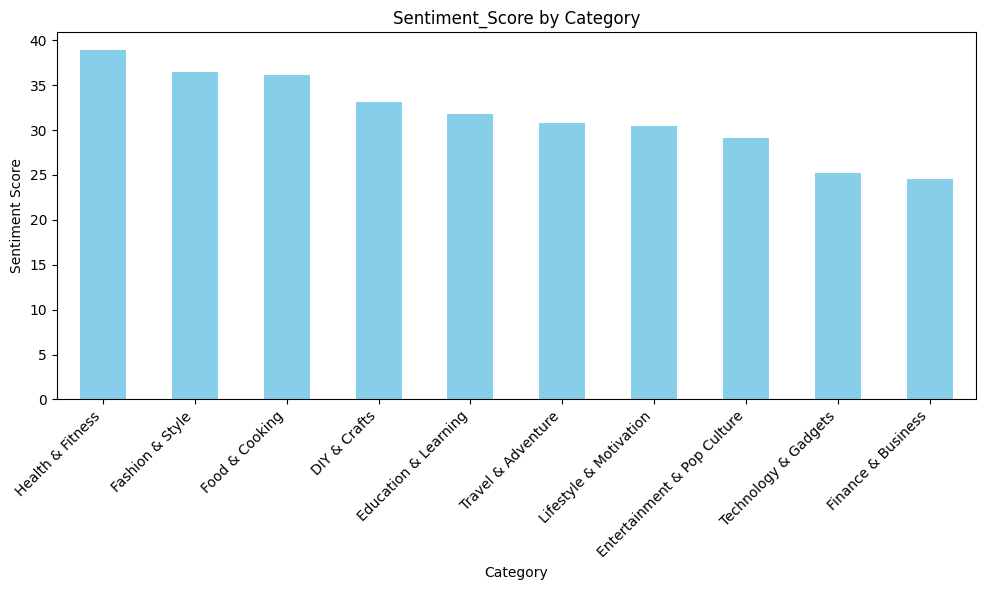

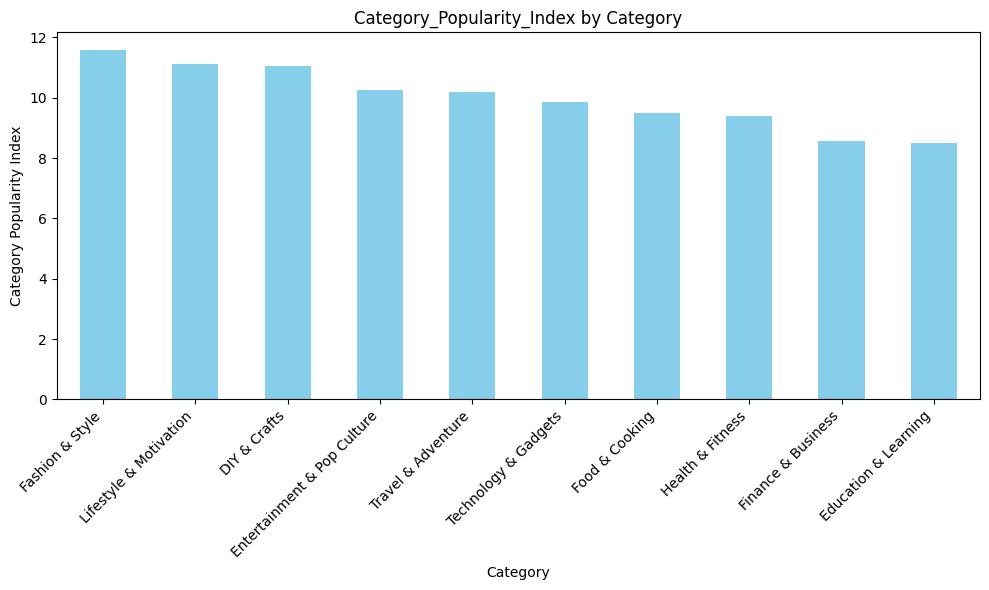

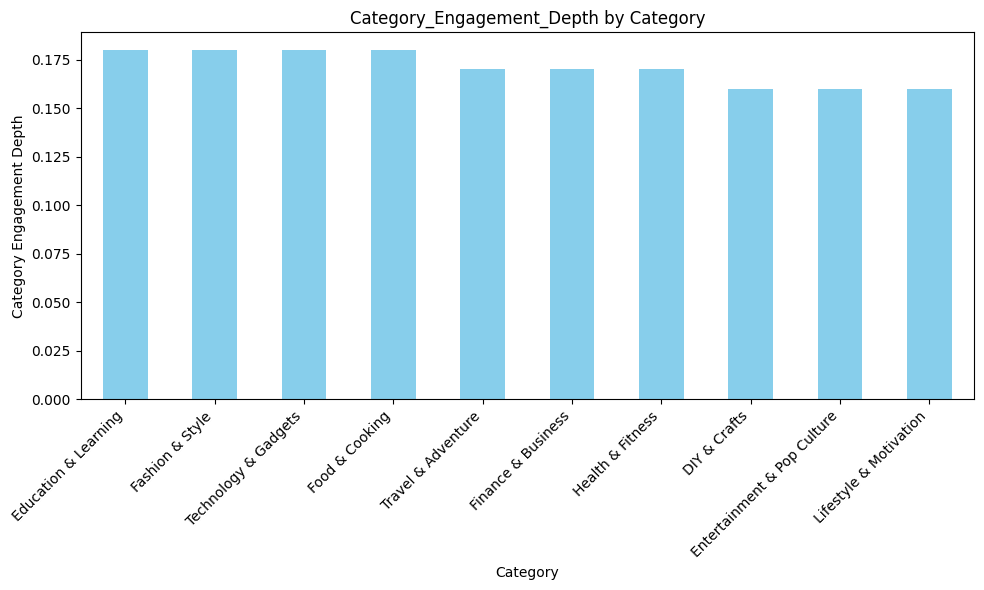

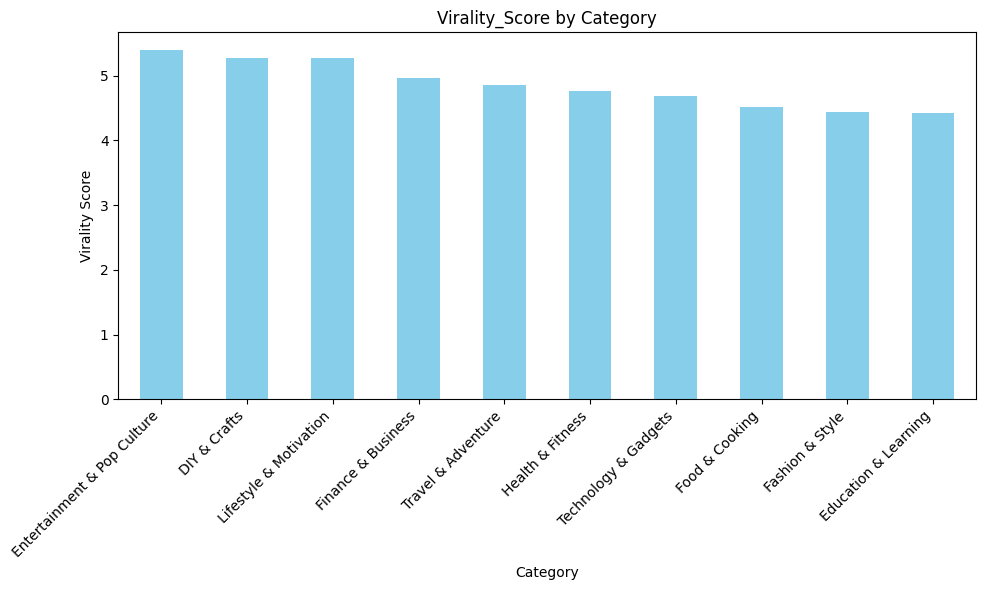

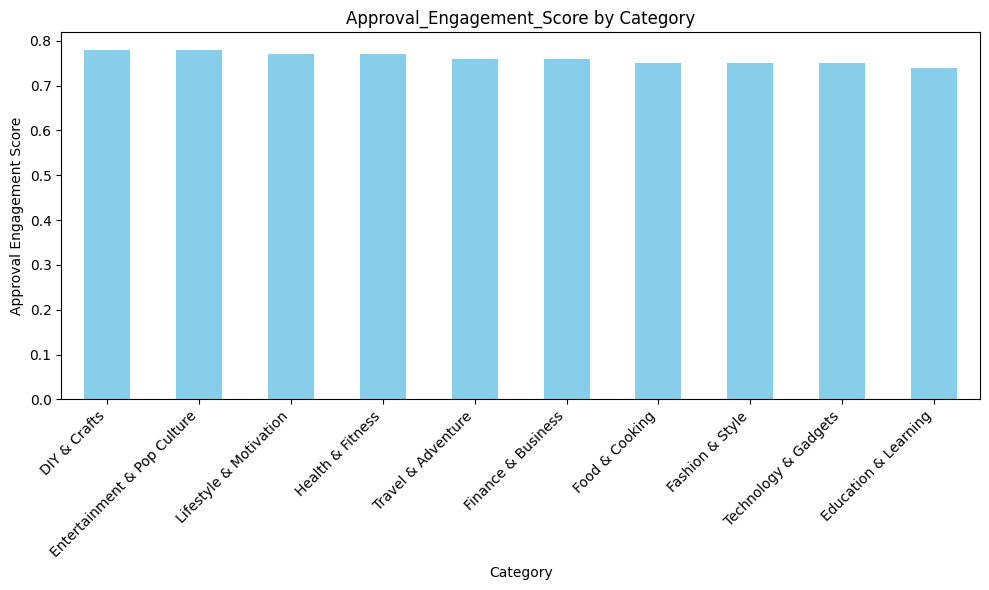

In [4]:
import matplotlib.pyplot as plt

# Select only KPIs (excluding raw counts)
kpis = [
    "Engagement_Rate",
    "Like_to_Comment_Ratio",
    "Comment_Rate",
    "Like_to_Dislike_Ratio",
    "Sentiment_Score",
    "Category_Popularity_Index",
    "Category_Engagement_Depth",
    "Virality_Score",
    "Approval_Engagement_Score"
]

# Create one plot per KPI
for kpi in kpis:
    plt.figure(figsize=(10,6))
    category_df[kpi].sort_values(ascending=False).plot(kind="bar", color="skyblue")
    plt.title(f"{kpi} by Category")
    plt.ylabel(kpi.replace("_", " "))
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


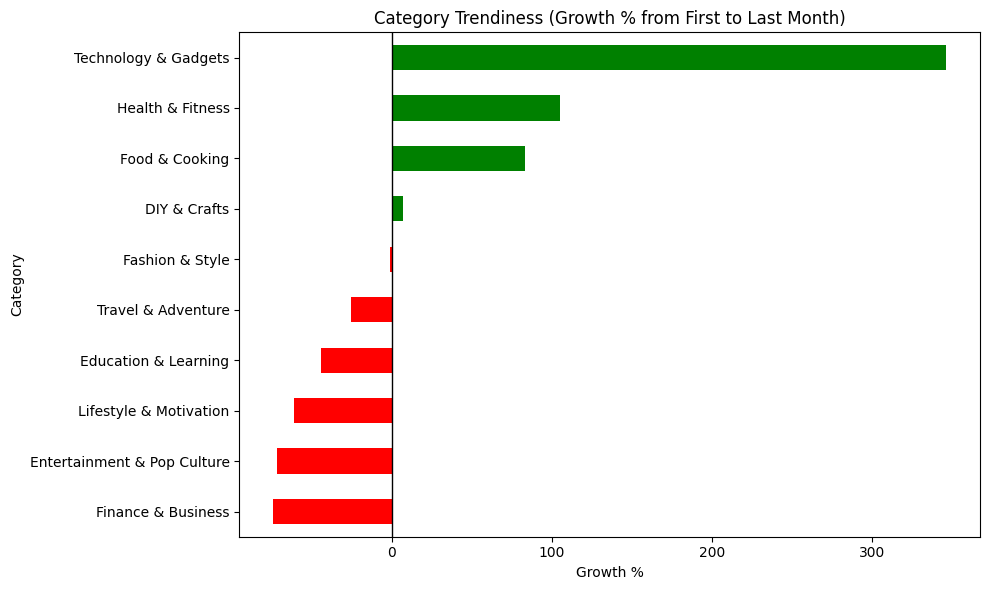

Category that lost trendiness the most: Finance & Business


In [ ]:



# Monthly aggregation
df["Month"] = df["Date"].dt.to_period("M")
trend_df = df.groupby(["Month", "Category"])[["Number_of_Likes","Number_of_Dislikes","Number_of_Comments"]].sum()
trend_df["Total_Interactions"] = trend_df.sum(axis=1)
trend_df = trend_df.reset_index()

# Compute start and end interactions per category
first_month = trend_df["Month"].min()
last_month = trend_df["Month"].max()

start_values = trend_df[trend_df["Month"] == first_month].groupby("Category")["Total_Interactions"].sum()
end_values = trend_df[trend_df["Month"] == last_month].groupby("Category")["Total_Interactions"].sum()

growth_df = pd.DataFrame({"Start": start_values, "End": end_values})
growth_df["Growth_%"] = ((growth_df["End"] - growth_df["Start"]) / growth_df["Start"].replace(0,1)) * 100
growth_df = growth_df.sort_values("Growth_%")

# Bar chart of growth rates
plt.figure(figsize=(10,6))
growth_df["Growth_%"].plot(kind="barh", color=growth_df["Growth_%"].apply(lambda x: "red" if x < 0 else "green"))
plt.title("Category Trendiness (Growth % from First to Last Month)")
plt.xlabel("Growth %")
plt.ylabel("Category")
plt.axvline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()

# Highlight the category that lost trendiness most
print("Category that lost trendiness the most:", growth_df.index[0])


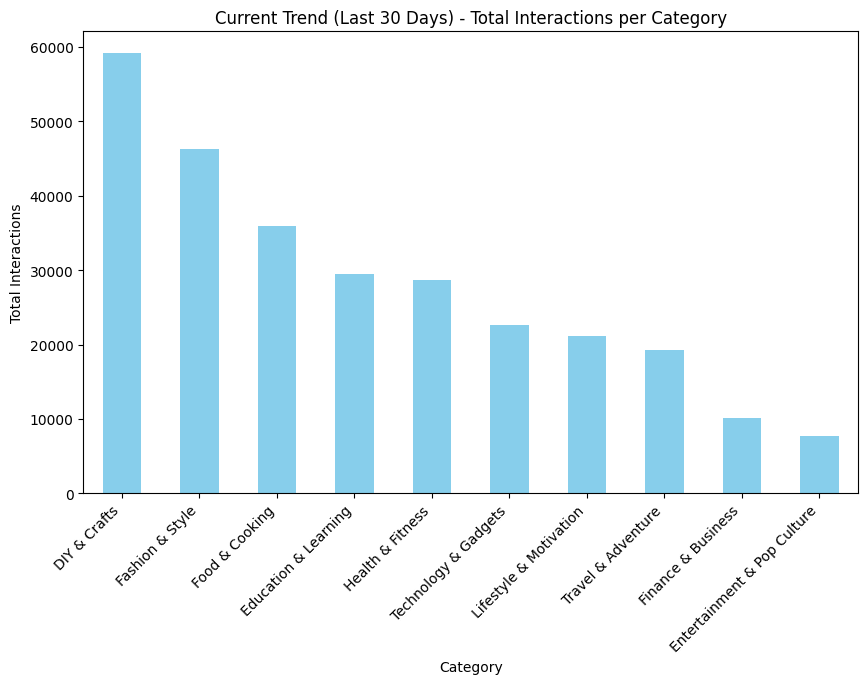

Current Trending Category: DIY & Crafts


In [ ]:
recent_df = df[df["Date"] >= df["Date"].max() - pd.Timedelta(days=30)]
recent_engagement = recent_df.groupby("Category")[["Number_of_Likes","Number_of_Dislikes","Number_of_Comments"]].sum()
recent_engagement["Total_Interactions"] = recent_engagement.sum(axis=1)
recent_engagement = recent_engagement.sort_values("Total_Interactions", ascending=False)

plt.figure(figsize=(10,6))
recent_engagement["Total_Interactions"].plot(kind="bar", color="skyblue")
plt.title("Current Trend (Last 30 Days) - Total Interactions per Category")
plt.ylabel("Total Interactions")
plt.xticks(rotation=45, ha="right")
plt.show()

print("Current Trending Category:", recent_engagement.index[0])


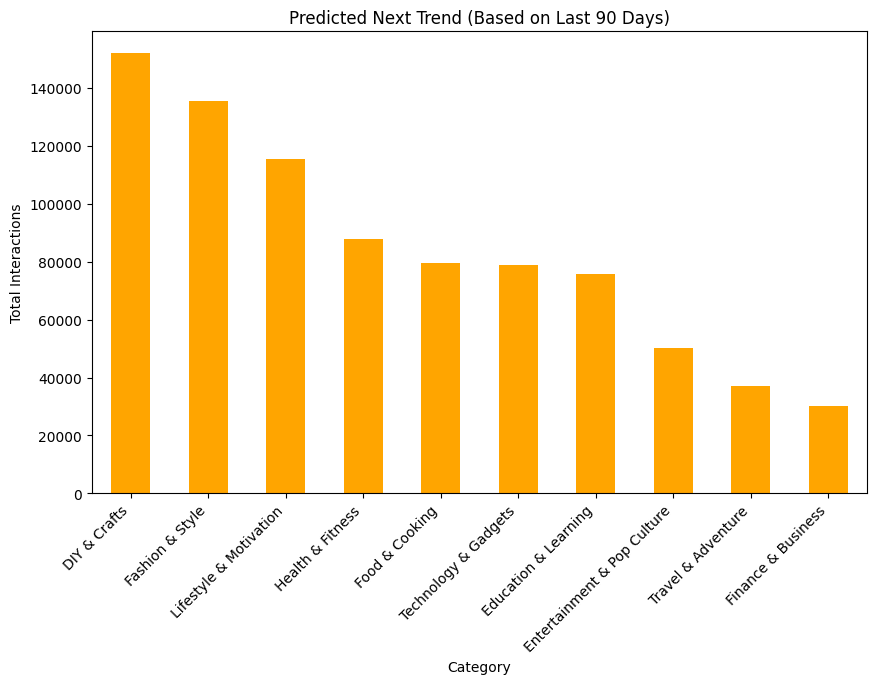

Next Potential Trending Category: DIY & Crafts


In [ ]:
forecast_df = df[df["Date"] >= df["Date"].max() - pd.Timedelta(days=90)]
forecast_trend = forecast_df.groupby("Category")[["Number_of_Likes","Number_of_Dislikes","Number_of_Comments"]].sum()
forecast_trend["Total_Interactions"] = forecast_trend.sum(axis=1)
forecast_trend = forecast_trend.sort_values("Total_Interactions", ascending=False)

plt.figure(figsize=(10,6))
forecast_trend["Total_Interactions"].plot(kind="bar", color="orange")
plt.title("Predicted Next Trend (Based on Last 90 Days)")
plt.ylabel("Total Interactions")
plt.xticks(rotation=45, ha="right")
plt.show()

print("Next Potential Trending Category:", forecast_trend.index[0])


11:45:22 - cmdstanpy - INFO - Chain [1] start processing
11:45:22 - cmdstanpy - INFO - Chain [1] done processing


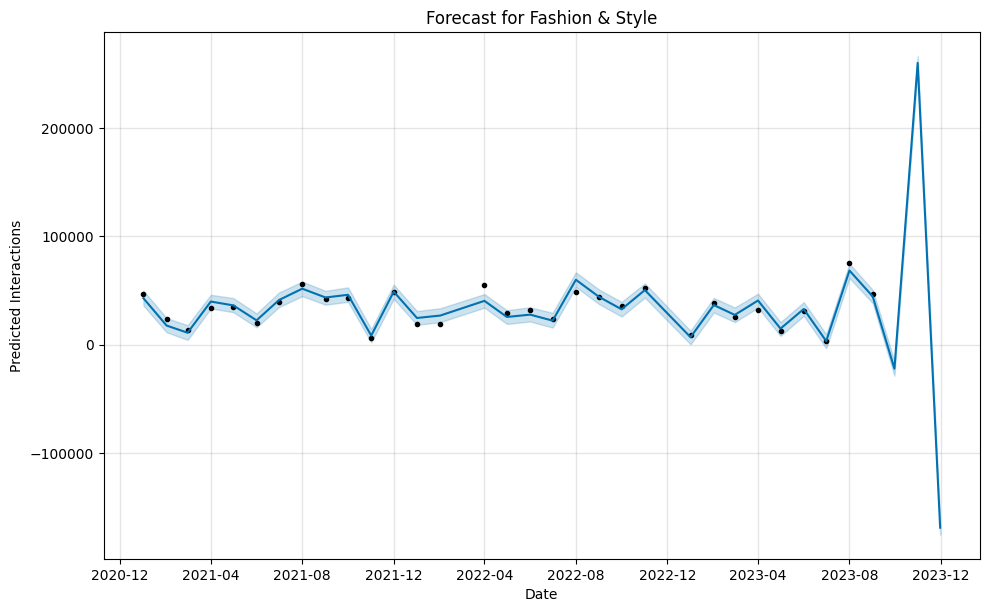

11:45:22 - cmdstanpy - INFO - Chain [1] start processing
11:45:22 - cmdstanpy - INFO - Chain [1] done processing


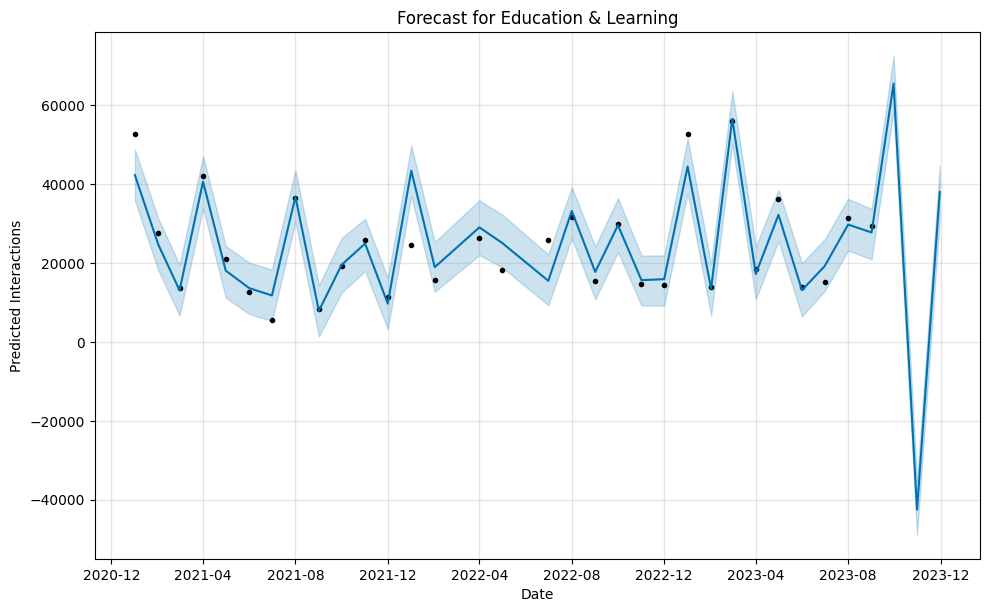

11:45:22 - cmdstanpy - INFO - Chain [1] start processing
11:45:22 - cmdstanpy - INFO - Chain [1] done processing


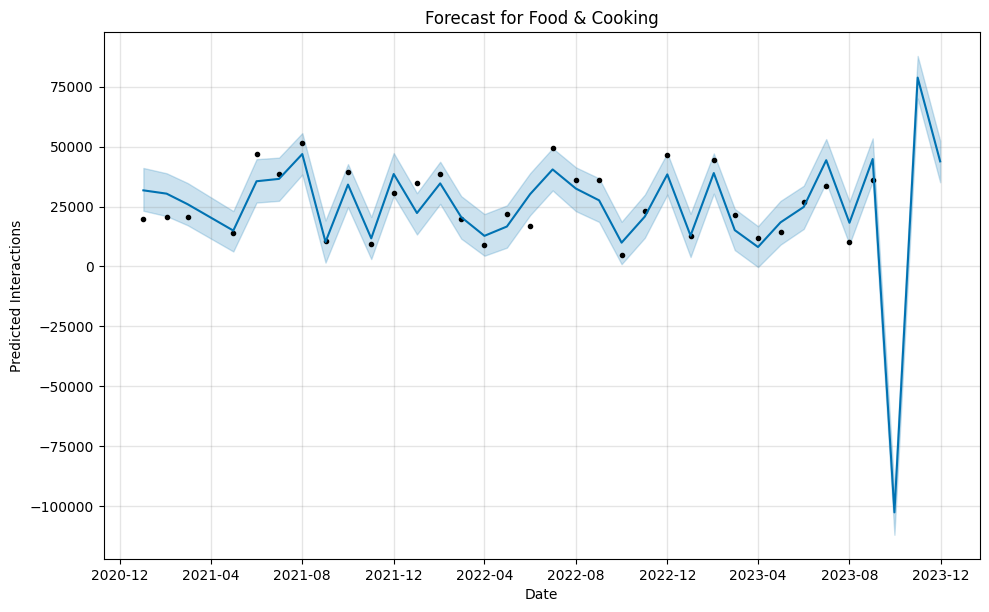

11:45:23 - cmdstanpy - INFO - Chain [1] start processing
11:45:23 - cmdstanpy - INFO - Chain [1] done processing


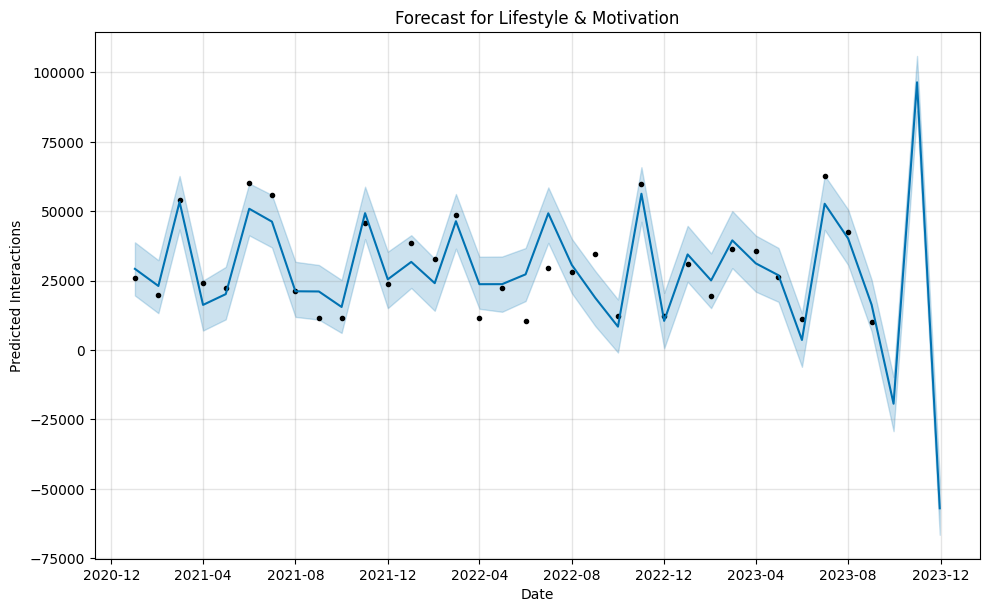

11:45:23 - cmdstanpy - INFO - Chain [1] start processing
11:45:23 - cmdstanpy - INFO - Chain [1] done processing


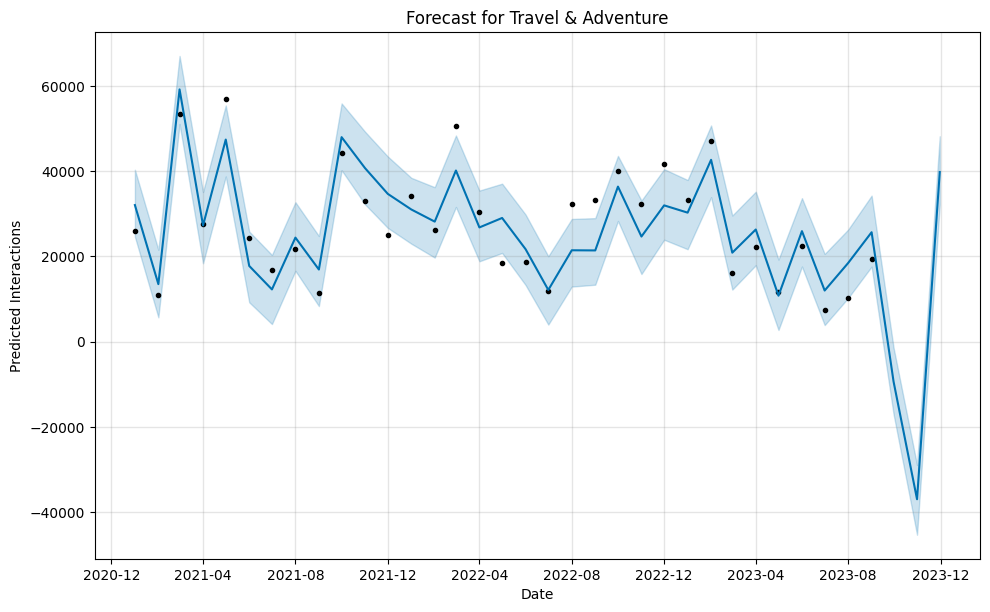

11:45:23 - cmdstanpy - INFO - Chain [1] start processing
11:45:23 - cmdstanpy - INFO - Chain [1] done processing


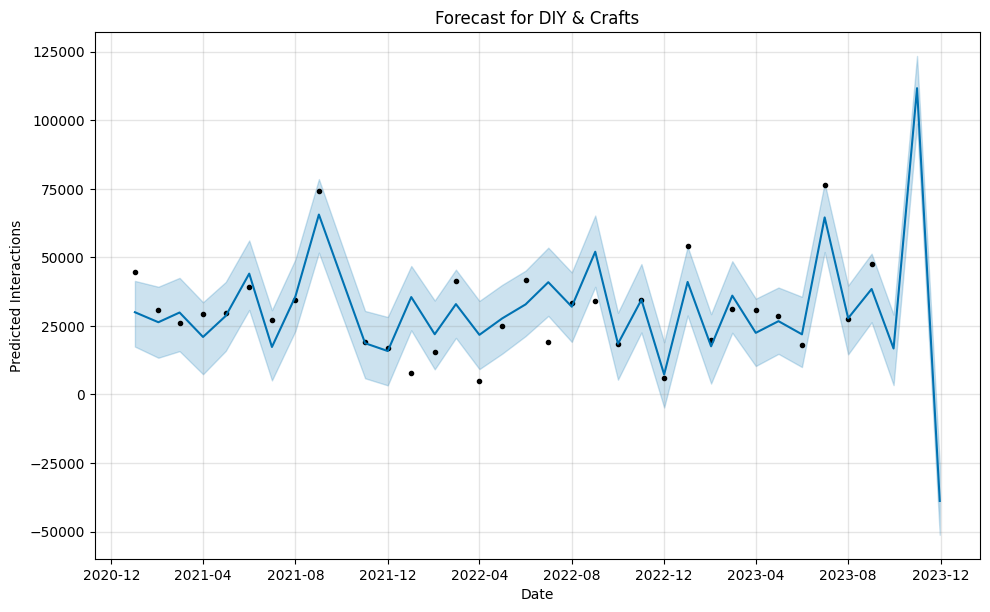

11:45:24 - cmdstanpy - INFO - Chain [1] start processing
11:45:24 - cmdstanpy - INFO - Chain [1] done processing


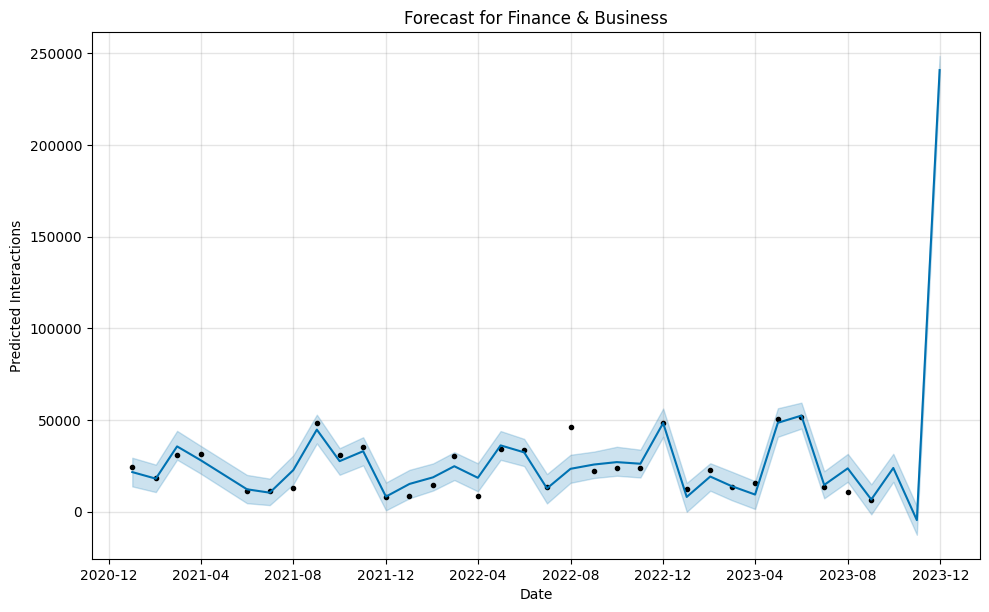

11:45:24 - cmdstanpy - INFO - Chain [1] start processing
11:45:24 - cmdstanpy - INFO - Chain [1] done processing


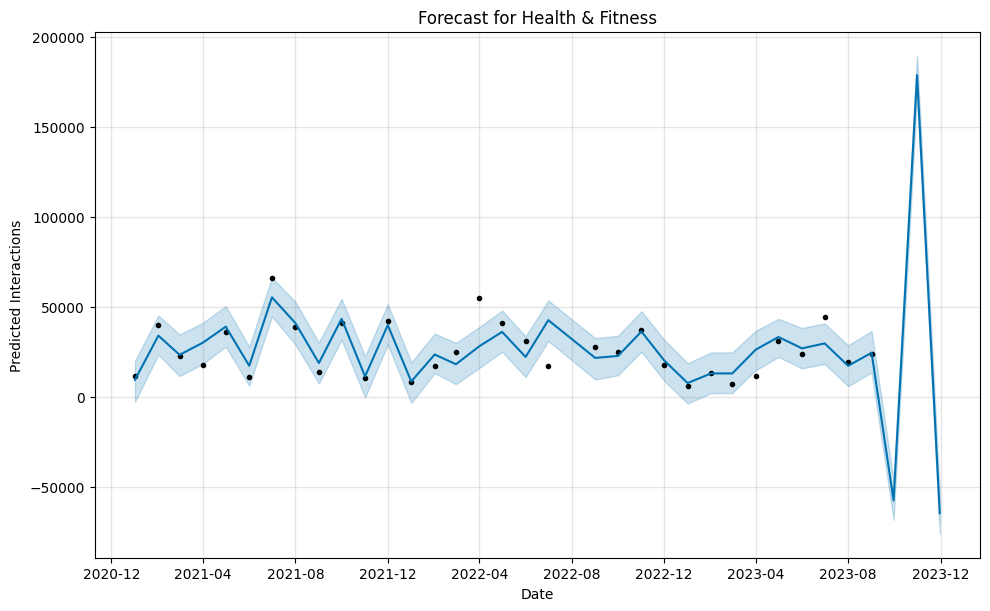

11:45:24 - cmdstanpy - INFO - Chain [1] start processing
11:45:24 - cmdstanpy - INFO - Chain [1] done processing


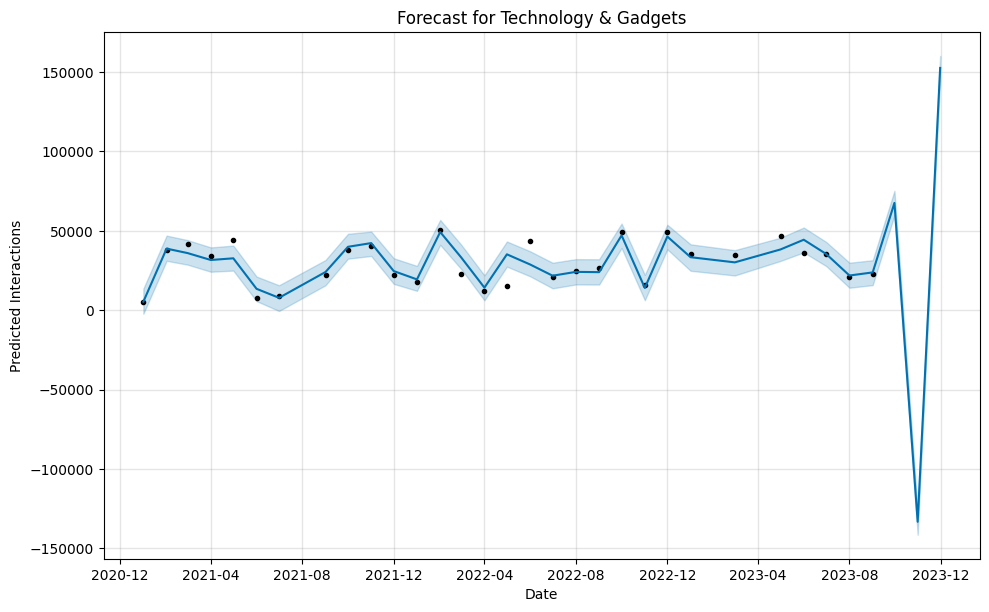

11:45:25 - cmdstanpy - INFO - Chain [1] start processing
11:45:25 - cmdstanpy - INFO - Chain [1] done processing


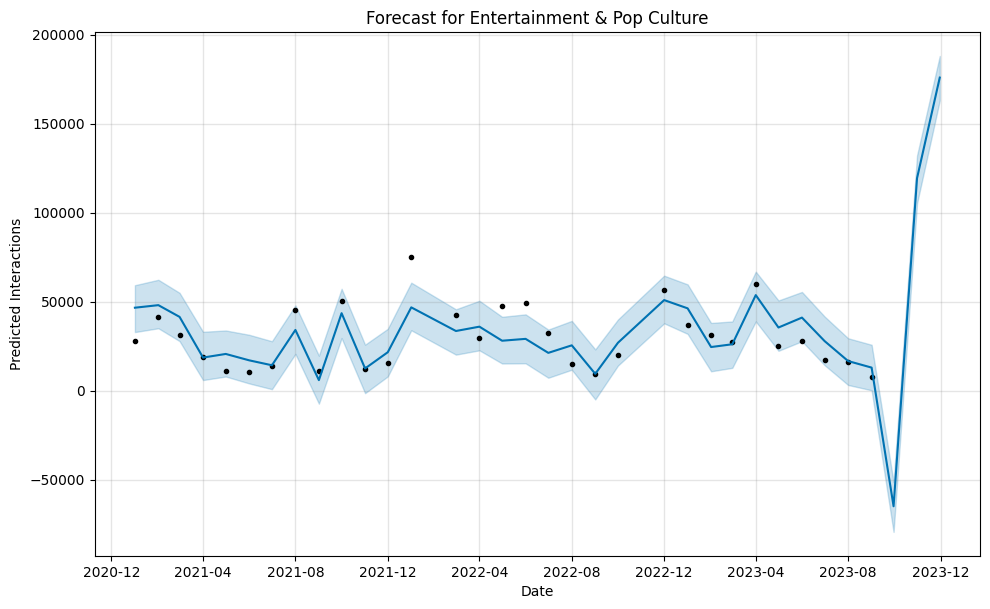

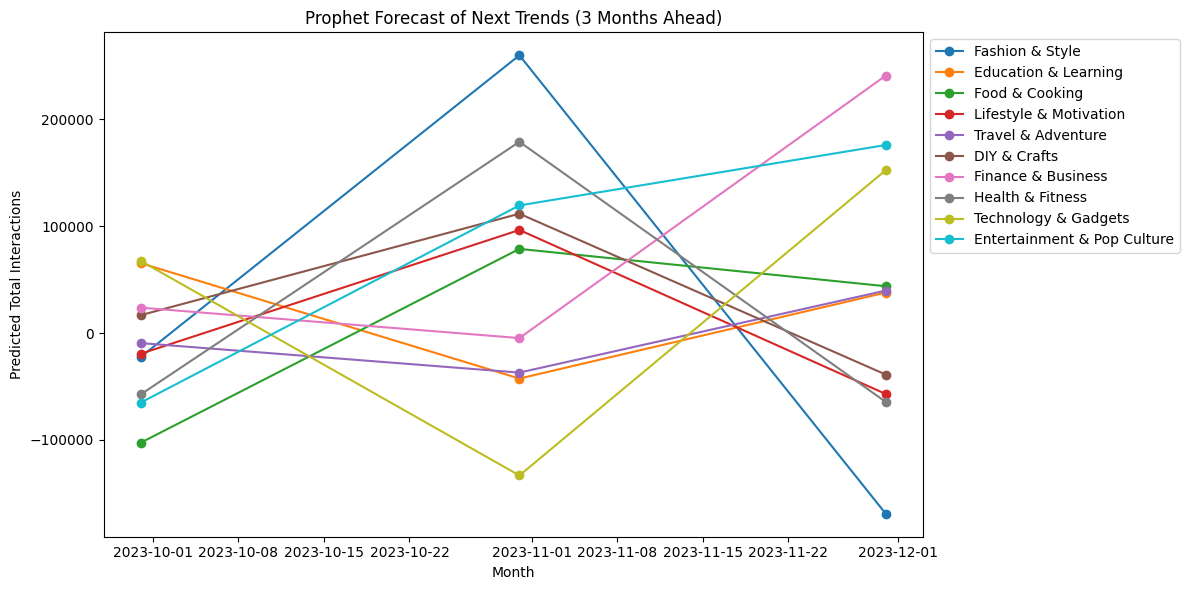

✅ Predicted Next Trending Category: Finance & Business


In [9]:

from prophet import Prophet

# ---------------------------
# Step 1: Prepare Monthly Data
# ---------------------------
df["Month"] = df["Date"].dt.to_period("M")
trend_df = (
    df.groupby(["Month", "Category"])[["Number_of_Likes","Number_of_Dislikes","Number_of_Comments"]]
    .sum()
)
trend_df["Total_Interactions"] = trend_df.sum(axis=1)
trend_df = trend_df.reset_index()

# ---------------------------
# Step 2: Forecast per Category
# ---------------------------
forecast_horizon = 3  # predict 3 months ahead
forecast_results = {}

for cat in df["Category"].unique():
    cat_data = trend_df[trend_df["Category"] == cat][["Month","Total_Interactions"]]
    cat_data = cat_data.copy()
    cat_data["ds"] = cat_data["Month"].dt.to_timestamp()   # Prophet requires column "ds"
    cat_data["y"] = cat_data["Total_Interactions"]         # Prophet requires column "y"
    
    if len(cat_data) > 12:   # need at least 1 year of data
        try:
            model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
            model.fit(cat_data[["ds","y"]])
            
            # Create future dataframe for forecasting
            future = model.make_future_dataframe(periods=forecast_horizon, freq="ME")
            forecast = model.predict(future)
            
            # Keep only forecasted values
            forecast_tail = forecast.tail(forecast_horizon)[["ds","yhat"]]
            forecast_results[cat] = forecast_tail.set_index("ds")["yhat"]
            
            # Plot forecast for each category
            model.plot(forecast)
            plt.title(f"Forecast for {cat}")
            plt.xlabel("Date")
            plt.ylabel("Predicted Interactions")
            plt.show()
            
        except Exception as e:
            print(f"⚠️ Could not forecast {cat}: {e}")

# ---------------------------
# Step 3: Combine Forecasts
# ---------------------------
forecast_df = pd.DataFrame(forecast_results)
forecast_df.index.name = "Forecast_Month"

# ---------------------------
# Step 4: Compare Categories
# ---------------------------
plt.figure(figsize=(12,6))
for cat in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[cat], marker="o", label=cat)

plt.title("Prophet Forecast of Next Trends (3 Months Ahead)")
plt.ylabel("Predicted Total Interactions")
plt.xlabel("Month")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# ---------------------------
# Step 5: Identify Next Trend
# ---------------------------
next_trend = forecast_df.iloc[-1].idxmax()
print("✅ Predicted Next Trending Category:", next_trend)
